In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
# Loading takehome_users file
users = pd.read_csv('takehome_users.csv', encoding = 'ISO-8859-1', index_col = 0)

In [205]:
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [206]:
# Loading takehome_user_engagement file
engagement = pd.read_csv('takehome_user_engagement.csv')

In [207]:
engagement['time_stamp'] = pd.to_datetime(engagement.time_stamp)

In [208]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [209]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


**building two new columns with 2 previous values of the login times**

In [210]:
# Adding two new columns to the engagement dataframe, with two last previous login times for each user
engagement['previous_1'] = engagement.groupby('user_id')['time_stamp'].shift(1)
engagement['previous_2'] = engagement.groupby('user_id')['time_stamp'].shift(2)

In [211]:
engagement.head()

,time_stamp,user_id,visited,previous_1,previous_2
0,2014-04-22 03:53:30,1,1,NaT,NaT
1,2013-11-15 03:45:04,2,1,NaT,NaT
2,2013-11-29 03:45:04,2,1,2013-11-15 03:45:04,NaT
3,2013-12-09 03:45:04,2,1,2013-11-29 03:45:04,2013-11-15 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-09 03:45:04,2013-11-29 03:45:04


**calcuating the difference between two consecutive times and difference between 1st and third login for each observation**

In [212]:
# Subtracting the login time from two times before that and putting it into a new columns called delta
engagement['delta1'] = engagement.time_stamp - engagement.previous_1
engagement['delta2'] = engagement.previous_1 - engagement.previous_2
engagement['delta3'] = engagement.time_stamp - engagement.previous_2

In [213]:
engagement.head()

,time_stamp,user_id,visited,previous_1,previous_2,delta1,delta2,delta3
0,2014-04-22 03:53:30,1,1,NaT,NaT,NaT,NaT,NaT
1,2013-11-15 03:45:04,2,1,NaT,NaT,NaT,NaT,NaT
2,2013-11-29 03:45:04,2,1,2013-11-15 03:45:04,NaT,14 days,NaT,NaT
3,2013-12-09 03:45:04,2,1,2013-11-29 03:45:04,2013-11-15 03:45:04,10 days,14 days,24 days
4,2013-12-25 03:45:04,2,1,2013-12-09 03:45:04,2013-11-29 03:45:04,16 days,10 days,26 days


**choosing the user_id based on the below conditions**

In [215]:
# user_id of the people who had logged into the product for 3 separate days in at least 1 seven-day period
ids = engagement[(engagement.delta1.dt.days>=1) & (engagement.delta2.dt.days>=1) & (engagement.delta3.dt.days<=7)].user_id.unique()

In [12]:
# Storing the user_id of the people
ids = engagement[engagement.delta.dt.days <=7].user_id.unique()

In [13]:
# building a dataframe from user_id's who were adopted users and giving them label value of 1
adopted_df = pd.DataFrame(np.ones(len(ids)), index = ids, columns=['label'])

In [14]:
# reeidexing the above dataframe to include all the user_id's, the new user_id's will have NA as the label value
adopted_df = adopted_df.reindex(users.index)

In [15]:
# filling NA values of the non-adopted users as 0
adopted_df.fillna(0, inplace = True)

In [16]:
adopted_df.head()

,label
object_id,
1,0.0
2,1.0
3,0.0
4,0.0
5,0.0


In [17]:
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


**adding the label column to user dataframe, with adopted users having 1 and non-adopted users having 0 as label value**

In [115]:
# merging the labels with the user dataframe
final_df = pd.merge(adopted_df, users, left_index = True, right_index = True)

In [116]:
final_df.head()

,label,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,,
1,0.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,1.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,0.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,0.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,0.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [117]:
#final_df.last_session_creation_time.fillna(final_df.last_session_creation_time.mean(), inplace = True)
final_df.dropna(subset = ['last_session_creation_time'], inplace = True)

In [118]:
# adding new columns of month, day and year from creation_time column
final_df['creation_time'] = pd.to_datetime(final_df.creation_time, infer_datetime_format = True)
final_df['month'] = final_df.creation_time.dt.month
final_df['day'] = final_df.creation_time.dt.day
final_df['year'] = final_df.creation_time.dt.year

In [119]:
# dropping 4 columns, name and email columns have no information
# invited_by_user_id column has around 50% NA values and creation_time column is replaced by year, month and day columns
final_df.drop(['name', 'email', 'creation_time', 'invited_by_user_id'], axis = 1, inplace = True)

In [120]:
# creating dummy variables from columns below
final_df_dummy = pd.get_dummies(final_df, columns = ['creation_source', 'year', 'month', 'day'], drop_first = True)

In [121]:
final_df_dummy.head()

,label,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,year_2013,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
object_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.398139e+09,1,0,11,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.0,1.396238e+09,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.363735e+09,0,0,94,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.369210e+09,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0.0,1.358850e+09,0,0,193,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score

In [123]:
# random forest classifier
rf = RandomForestClassifier()

In [124]:
y = final_df_dummy.label
X = final_df_dummy.drop('label', axis = 1)

In [125]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [126]:
# performing cross validation using the random forest classifier
cross_val = cross_val_score(rf, X_train, y_train, cv = 10)

**accuracy values, calculated using cross validation on the training data**

In [127]:
cross_val

array([0.94475921, 0.94334278, 0.94617564, 0.94617564, 0.9490085 ,
       0.93767705, 0.95184136, 0.93626062, 0.94184397, 0.94893617])

In [128]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [129]:
y_pred = rf.predict(X_test)

**accuracy on test data**

In [130]:
# accuracy value performed on test data
rf.score(X_test, y_pred)

1.0

**f1 score on test data**

In [131]:
# f1_score value on test data
f1_score(y_test, y_pred)

0.8494983277591973

**classification report**

In [132]:
print(classification_report(y_test, y_pred, target_names = ['non-adopted', 'adopted']))

              precision    recall  f1-score   support

 non-adopted       0.95      0.99      0.97      1440
     adopted       0.93      0.78      0.85       325

    accuracy                           0.95      1765
   macro avg       0.94      0.88      0.91      1765
weighted avg       0.95      0.95      0.95      1765



In [138]:
# calculating the values to calcuate precision_recall curve
precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

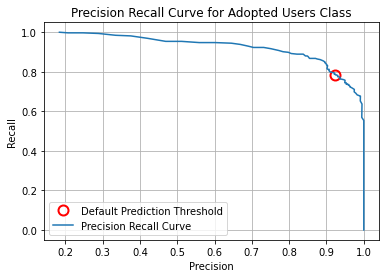

In [161]:
middle_point = np.argmin(np.abs(thresholds - .5))
plt.plot(precision[middle_point], recall[middle_point], 'ro', fillstyle = 'none', markersize = 10, mew = 2,
         label = 'Default Prediction Threshold')
plt.plot(precision, recall, label = "Precision Recall Curve")
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title("Precision Recall Curve for Adopted Users Class")
plt.legend()
plt.grid()

**area under the precision_recall curve, as a measure of how good the model performes from 0 (bad) to 1 (good)**

In [164]:
av_pr = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
print("Average Precision Score of the model: {:.2f}".format(av_pr))

Average Precision Score of the model: 0.93


**most important features of the model**

In [165]:
feature_importances = list(zip(X.columns, rf.feature_importances_))
features_sorted = sorted(feature_importances, key = lambda x: x[1], reverse = True)
features, scores = zip(*features_sorted)
features_df = pd.DataFrame(np.array(scores), index = features, columns = ["value"])

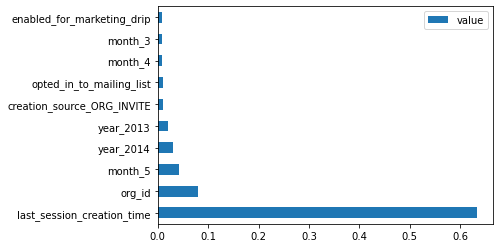

In [195]:
features_df[:10].plot(kind = 'barh')